# Practical Session 3
## Biomedical Signals and Images
## Biomedical Image Processing (Image enhancement, Filtering and Segmentation)
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Hamza Mekhzoum and Jef Vandemeulebroucke

Questions email or Teams: hamza.mekhzoum@vub.be


#### Student Names and IDs:

<font color=blue>Students names and IDs: Wouter Apts - 0606557 & Yajing Wang - 0609591</font> <Br>
<font color=blue>Academic Year </font>: 2023-2024

# Purpose
The purpose of this exercise session is to obtain insight in the image enhancement, filtering and segmentation operations commonly applied in medical image processing. For more information on these concepts see the course slides and the related material.

The jupyter notebook should be submitted as the report of each practical session by teams of two students. In [colab](https://colab.research.google.com/notebooks/welcome.ipynb) you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The deadline for the report submission is December 18th, 2023, at 23.59.

Any report sent after the deadline will not be graded.

### Required modules
- [numpy](https://pypi.org/project/numpy/)
- [pylab](https://scipy.github.io/old-wiki/pages/PyLab)
- [scipy](https://www.scipy.org/getting-started.html)
- [skimage](https://scikit-image.org/docs/dev/api/skimage.html#module-skimage)
- [math](https://docs.python.org/3/library/math.html)
- [sklearn](https://scikit-learn.org/stable/index.html)
- [Matplotlib](https://matplotlib.org/3.1.1/index.html)

### 1 Image enhancement
#### 1.1 The image histogram
The histogram is a representation of how many pixels have a certain intensity in the corresponding image. Medical images can however have a large intensity range, or even floating point intensities, making the pixel count per intensity low or impractical. In practice, intensities are therefore usually binned, i.e. grouped in a reduced number of bins with similar intensity.
#### 1.2  Image enhancement
We shall discuss two ways of contrast improvement. The first is [linear contrast mapping](http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) or [histogram stretching](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html), which involves a linear transformation on the image intensities, such that the transformed intensities cover to the full range.
Another way to improve the contrast is to perform [histogram equalisation](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html). In this case, the aim is to obtain a uniform histogram, in which all intensities are equally represented. This can be done by applying a nonlinear transformation on the image intensities. It can be shown that the transform corresponds to the cumulative histogram.

#### Example 1: Linear contrast mapping

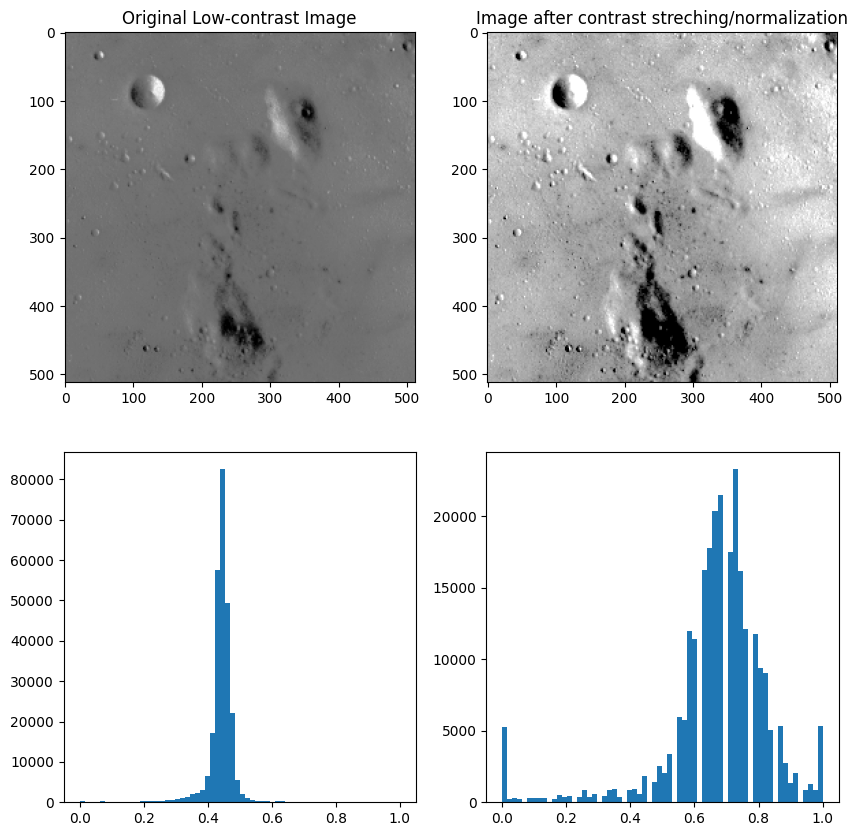

In [3]:
import numpy as np
from skimage import data, img_as_float
from pylab import show,title,figure,imshow,subplot,subplots_adjust, hist


# Load an example image
low_contrast_image = data.moon()

"contrast stretching (i.e., normalization),"
"where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles."

p2, p98                  = np.percentile(low_contrast_image , (2, 98))

i_min, i_max             = p2,p98

image_cliping            = np.clip(low_contrast_image , i_min,i_max)

image_constrast_streched = (image_cliping - i_min) / float(i_max - i_min)

"Displaying low contrast image, contrast-enhanced image and their corresponding histogrms"

h,w=2,2    # figure height and width
figure(figsize=(10,10))
subplots_adjust(hspace=.2)

subplot(h,w,1)
imshow(low_contrast_image , cmap='gray')
title('Original Low-contrast Image')

subplot(h,w,2)
imshow(image_constrast_streched, cmap='gray')
title('Image after contrast streching/normalization')

subplot(h,w,3)
hist(img_as_float(low_contrast_image).ravel(),bins=64) #plotting histogram of original low-contrast image

subplot(h,w,4)
hist(image_constrast_streched.ravel(),bins=64)#plotting histogram of contrast streched/normalized image
show()

#### Exercise 1.1: Linear contrast mapping
By following above example 1, solve the below exercise.

- Read an image (Brain.tiff)
  
  hint: user can load the image in different ways, like: [skimage.io.imread](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread), [plt.imread](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html), [imread](https://pypi.org/project/imread/)
  
  preferable: from imread import imread. Install imread with pip install imread
- Perform linear contrast mapping (contrast streching/normalization)
- Display input image, output image (after linear contrast mapping), their corresponding histograms with 64 bins in a 2x2 figure.

#### Report
- Look at the output result and its histogram. Compare it with the histogram of the original input image. Comment about difference between them.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


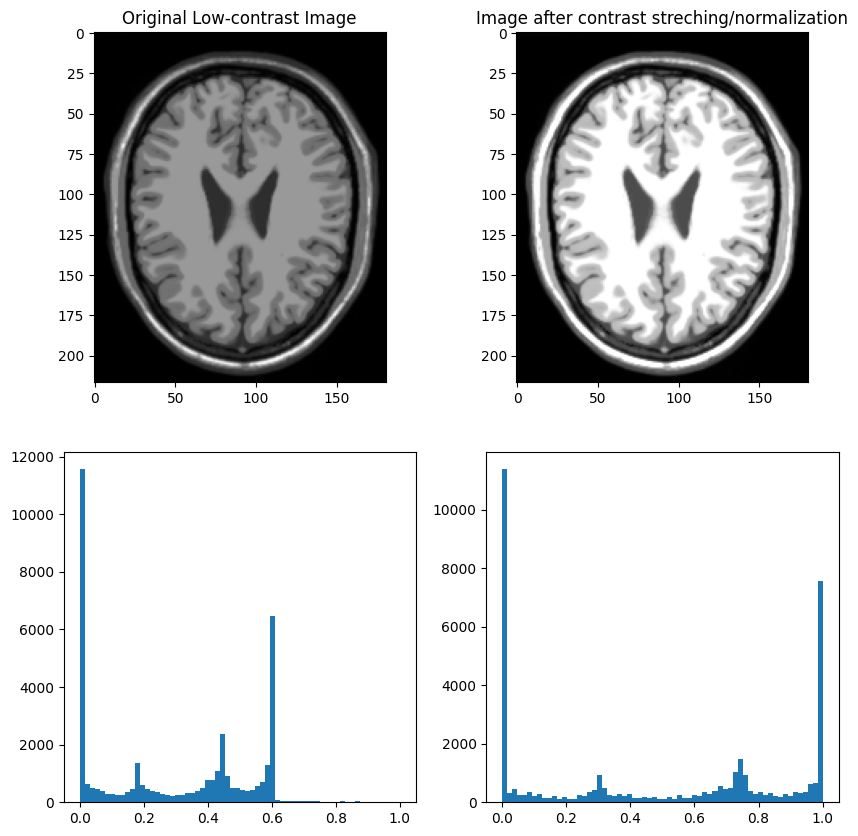

In [4]:
# your code is here
import numpy as np
from skimage.io import imread
from pylab import show,title,figure,imshow,subplot,subplots_adjust, hist
from os.path import dirname, join as pjoin, exists
from google.colab import drive


drive.mount('/content/gdrive')
path = pjoin('gdrive', 'MyDrive','WPO3')
filename = 'Brain.tiff'
original_image = imread(pjoin(path, filename), as_gray=False)

# Contrast stretching
p2, p98 = np.percentile(original_image , (2, 98))
i_min, i_max = p2,p98
image_cliping = np.clip(original_image , i_min,i_max)
image_constrast_streched = (image_cliping - i_min) / float(i_max - i_min)


# Displaying low contrast image, contrast-enhanced image and their corresponding histogarms
h,w=2,2
figure(figsize=(10,10))
subplots_adjust(hspace=.2)

subplot(h,w,1)
imshow(original_image, cmap='gray')
title('Original Low-contrast Image')

subplot(h,w,2)
imshow(image_constrast_streched, cmap='gray')
title('Image after contrast streching/normalization')

# Plotting histogram of original low-contrast image
subplot(h,w,3)
hist(img_as_float(original_image).ravel(),bins=64)

# Plotting histogram of contrast streched/normalized image
subplot(h,w,4)
hist(image_constrast_streched.ravel(),bins=64)
show()

#### Report:
- The difference between these 2 sets of graphs are:

1. for the brain graphs: contrast stretching/normalization has enhanced the contrast, which leads to a clearer image where the structures within the brain, such as the ventricles and the surrounding brain tissue, are more visible and differentiated.

2. For the histogram graphs: Before the contrast streching, the histogram has most of the intensity values concentrated in a narrow range, which contributes to the lower contrast of the image. After the contrast stretching, the histogram is spread across a wider range of intensity values, which is indicative of an increase in contrast. The two peaks in the graph are also spread out and less pronounced, showing that the intensity values are more evenly distributed across the range.


#### Example 2: Histogram equalisation
Students are suggested to have a look into [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) for a calculation of histogram.

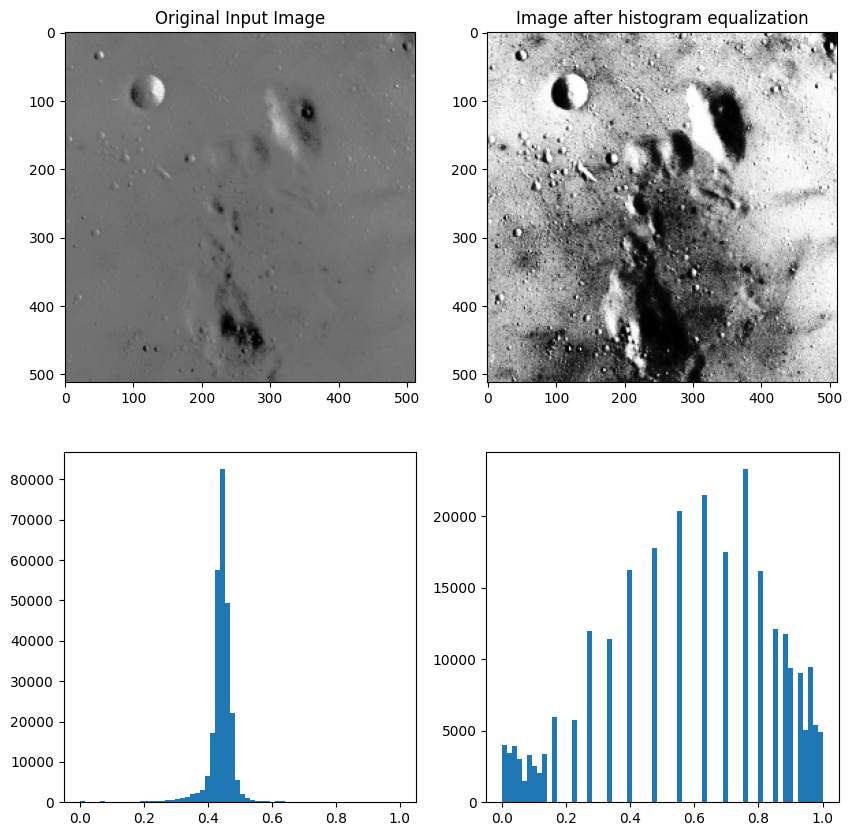

In [5]:
import numpy as np
from skimage import data, img_as_float
import pylab
from pylab import show,title,figure,imshow,subplot,subplots_adjust

"Load an example image"
image = data.moon()

"calculation of histogram"
hist, bin_edges = np.histogram(image.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = hist.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(image.flat, bin_centers, img_cdf)
img_eq = out.reshape(image.shape)

"Displaying input image, image-histogram equalized and their corresponding histogrms"

h,w=2,2    # figure height and width
figure(figsize=(10,10))
subplots_adjust(hspace=.2)

subplot(h,w,1)
imshow(image , cmap='gray')
title('Original Input Image')

subplot(h,w,2)
imshow(img_eq, cmap='gray')
title('Image after histogram equalization')

subplot(h,w,3)
pylab.hist(img_as_float(image).ravel(),bins=64) #plotting histogram of original image

subplot(h,w,4)
pylab.hist(img_eq.ravel(),bins=64)#plotting histogram of histogram-equalized image
show()



#### Exercise 1.2: Histogram equalization
By following the example 2, solve the below exercise.

- Read an image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
  
  eg: from imread import imread
  
  
- Perform histogram equalization [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)
- Display input image, output image (after linear contrast mapping) of exercise 1.1, output image (histogram-equalized), their corresponding histograms with 64 bins in a 3x2 figure.

#### Report
- Look at the output results and their histograms. Compare them with the histogram of the original input image. The histogram of the histogram-equalized output image is not perfectly uniform. What is the reason for this?

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


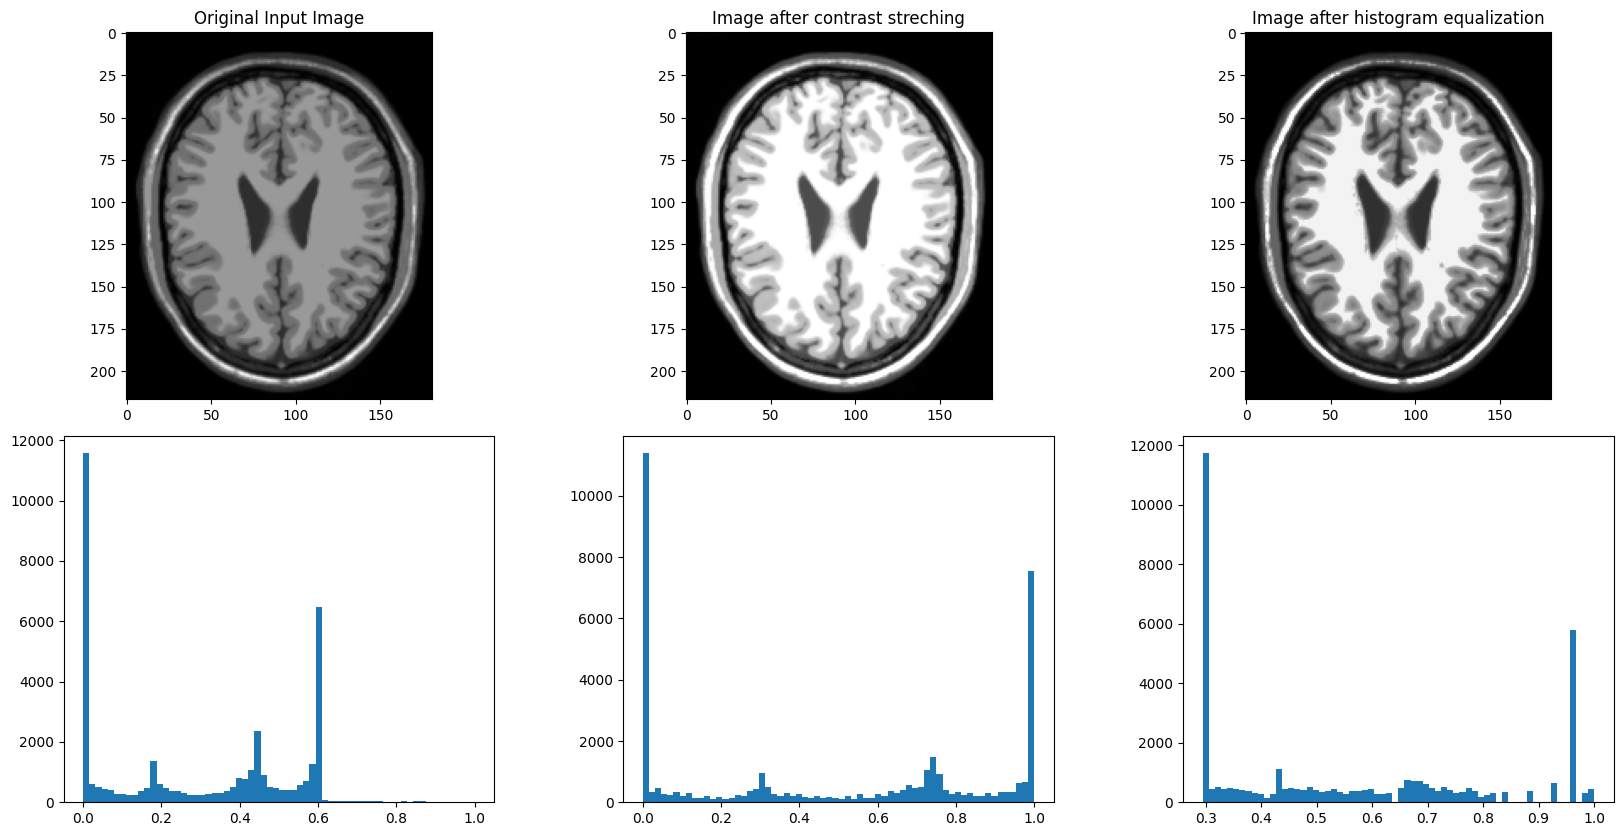

In [6]:
# your code is here
import numpy as np
from skimage.io import imread
import pylab
from pylab import show,title,figure,imshow,subplot,subplots_adjust
from os.path import dirname, join as pjoin, exists
from google.colab import drive


drive.mount('/content/gdrive')
path = pjoin('gdrive', 'MyDrive','WPO3')
filename = 'Brain.tiff'


original_image = imread(pjoin(path, filename), as_gray=False)

# Calculation of histogram
his, bin_edges = np.histogram(original_image.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = his.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(original_image.flat, bin_centers, img_cdf)
img_eq = out.reshape(original_image.shape)

# Displaying input image, image-histogram equalized and their corresponding histogrms
h,w=2,3
figure(figsize=(20,10))
subplots_adjust(hspace=.1, wspace=.3)

subplot(h,w,1)
imshow(original_image , cmap='gray')
title('Original Input Image')

subplot(h,w,2)
imshow(image_constrast_streched, cmap='gray')
title('Image after contrast streching')

subplot(h,w,3)
imshow(img_eq, cmap='gray')
title('Image after histogram equalization')

# Plotting histogram of original low-contrast image
subplot(h,w,4)
pylab.hist(img_as_float(original_image).ravel(),bins=64)

# Potting histogram of contrast streched/normalized image
subplot(h,w,5)
pylab.hist(image_constrast_streched.ravel(),bins=64)

# Potting histogram of histogram-equalized image
subplot(h,w,6)
pylab.hist(img_eq.ravel(),bins=64)
show()

####Report:
- The histogram of the histogram-equalized output image is not perfectly uniform. What is the reason for this?


  1. The regions in the original image have different densities and characteristics, which do not appear uniformly. Since histogram equalization relies on the original intensity distribution, it cannot create a uniform histogram if the image content itself is not uniform.

  2. MRI images have a limited number of discrete intensity levels (often 256 levels in grayscale images). When applying histogram equalization, these discrete levels can only be mapped to a limited set of new values, which may not result in a perfectly flat histogram.


### 2 Image Denoising
Filters are used in medical imaging to enhance or suppress certain features of images. They may be used to improve the image quality before reviewing them, or as a preprocessing step to improve the result of further image processing steps such as segmentation.
For many filters, the extent of the neighbourhood considered for each pixel is determined by a spatial filter mask (kernel). The weights of the mask can be combined with the underlying pixels in a linear way, in which case this comes down to a convolution of the mask and image. Other filters however exist, based on non-linear operations.
#### 2.1 Noise suppression
An important processing task is the suppression of noise, either for enhanced visualization or for improving the result of further processing. Noise can often be assumed to be a high frequency signal. Many noise reduction approaches are therefore based on attenuating the high frequency components while preserving the low frequency components. A popular linear filter for this purpose is the (2D) Gaussian filter.
Low pass filtering for noise suppression has the side effect of blurring the edges of an image, which is often undesirable. Smoothing filters that preserve the edges of an image have therefore been proposed, such as the non-linear median filter.
#### 2.2 Edge enhancement
Image filtering can also be used for the enhancement or detection of edges. The goal of such filters is often to enhance the edge contrast of an image in an attempt to improve its apparent sharpness. If the final goal is to retain an edge image, i.e. a binary image in which only the edges are preserved, the operation is termed edge detection. Such images can later on serve as inputs for further image processing steps such as segmentation.

#### Example 3: Image denoising by different filters (i.e, [Gaussian filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html), [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) and [average filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html))

<ipython-input-6-0742fdc63bdf>:5: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image           = misc.ascent()                             # load input image


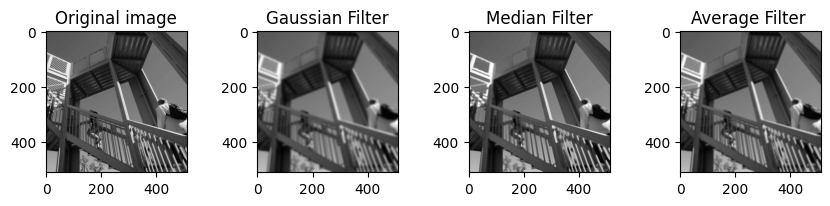

In [ ]:
from scipy import misc
from scipy import ndimage
from pylab import show,title,figure,subplot,subplots_adjust, imshow

image           = misc.ascent()                             # load input image
Gaussian_filter = ndimage.gaussian_filter(image, sigma = 3) # gaussian filter with standard deviation = 3
median_filter   = ndimage.median_filter(image, size = 7)    # median filter with kernel size of 7
kernel          = np.ones(shape=(6,6))/18                    # define kernel for average filter, kernel size is 6
average_filter  = ndimage.convolve (image, kernel)          # average filter



"displaying original image, results from gaussian, median and average filters"

h,w=1,4    # figure height and width
figure(figsize=(10,10));subplots_adjust(hspace=0.2,wspace=0.5)
subplot(h,w,1);imshow(image, cmap='gray');title('Original image')
subplot(h,w,2);imshow(Gaussian_filter, cmap='gray');title('Gaussian Filter')
subplot(h,w,3);imshow(median_filter, cmap='gray');title('Median Filter')
subplot(h,w,4);imshow(average_filter , cmap='gray');title('Average Filter ')
show()

#### Example 4: Edge Enhancement
Enhancing edge of an image using [prewitt function](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt)

<ipython-input-7-e0505eb9e28f>:5: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image  = misc.ascent()      # load input image


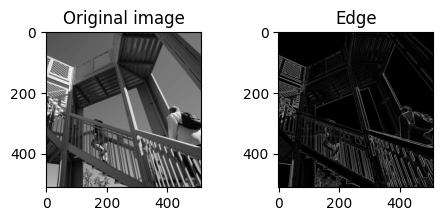

In [ ]:
from scipy import misc
from skimage.filters import prewitt
from pylab import show,title,figure,subplot,subplots_adjust, imshow

image  = misc.ascent()      # load input image
Edge   = prewitt (image)   # find edge

h,w=1,2                   # figure height and width
figure(figsize=(5,5));subplots_adjust(hspace=0.5, wspace=0.5)
subplot(h,w,1);imshow(image, cmap='gray');title('Original image')
subplot(h,w,2);imshow(Edge, cmap='gray');title('Edge')
show()

#### Exercise 2
To illustrate image filtering we will try to restore an image, obtained by distorting Brain.tiff with Salt and Pepper noise (Brain_noise_SnP.tiff).
In the first part of the exercise, we will focus on Gaussian smoothing. Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Read input image (Brain.tiff)
- Read noisy image (Brain_noise_SnP.tiff)
- Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Calculate the difference image of the input noisy image with the obtained filtered image.
- Calculate the difference image of the obtained filtered image with the provided ground truth (Brain.tiff).
- Create a simple edge map of the obtained filtered image using the [edge function and prewitt mask](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt).
- Display input image, noisy image, gaussian filtered image, filtered noise and unfiltered noise.

#### Report
- Repeat the process, for a [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) for a kernel of size 3 and an average filter using a kernel of size 3. For the average filter you will have to create your own filter kernel.
- Calculate the [root mean squared differences (RMSD)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) of the pixels of the obtained filtered images with those of the ground truth. RMSD is a frequently used measure of the differences between values. Hint: RMSD = [sqrt](https://www.tutorialspoint.com/python/number_sqrt.htm) ([mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (input image, filtered image))
- Display a three-by-four plot with the filtered images obtained using the different filters, the filtered noise, the noise that remained after the filtering (unfiltered) and the edge maps of the filtered image.
- Provide all three values for the RMSD between filtered image and the ground truth.
- Comment briefly on the results.
- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?
- Which filter works best in terms of RMSD and why?
- Which filter preserves the edges the best?

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


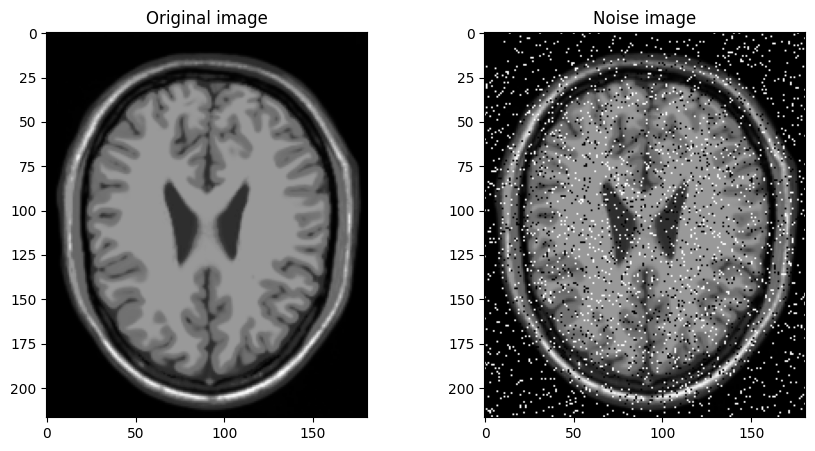

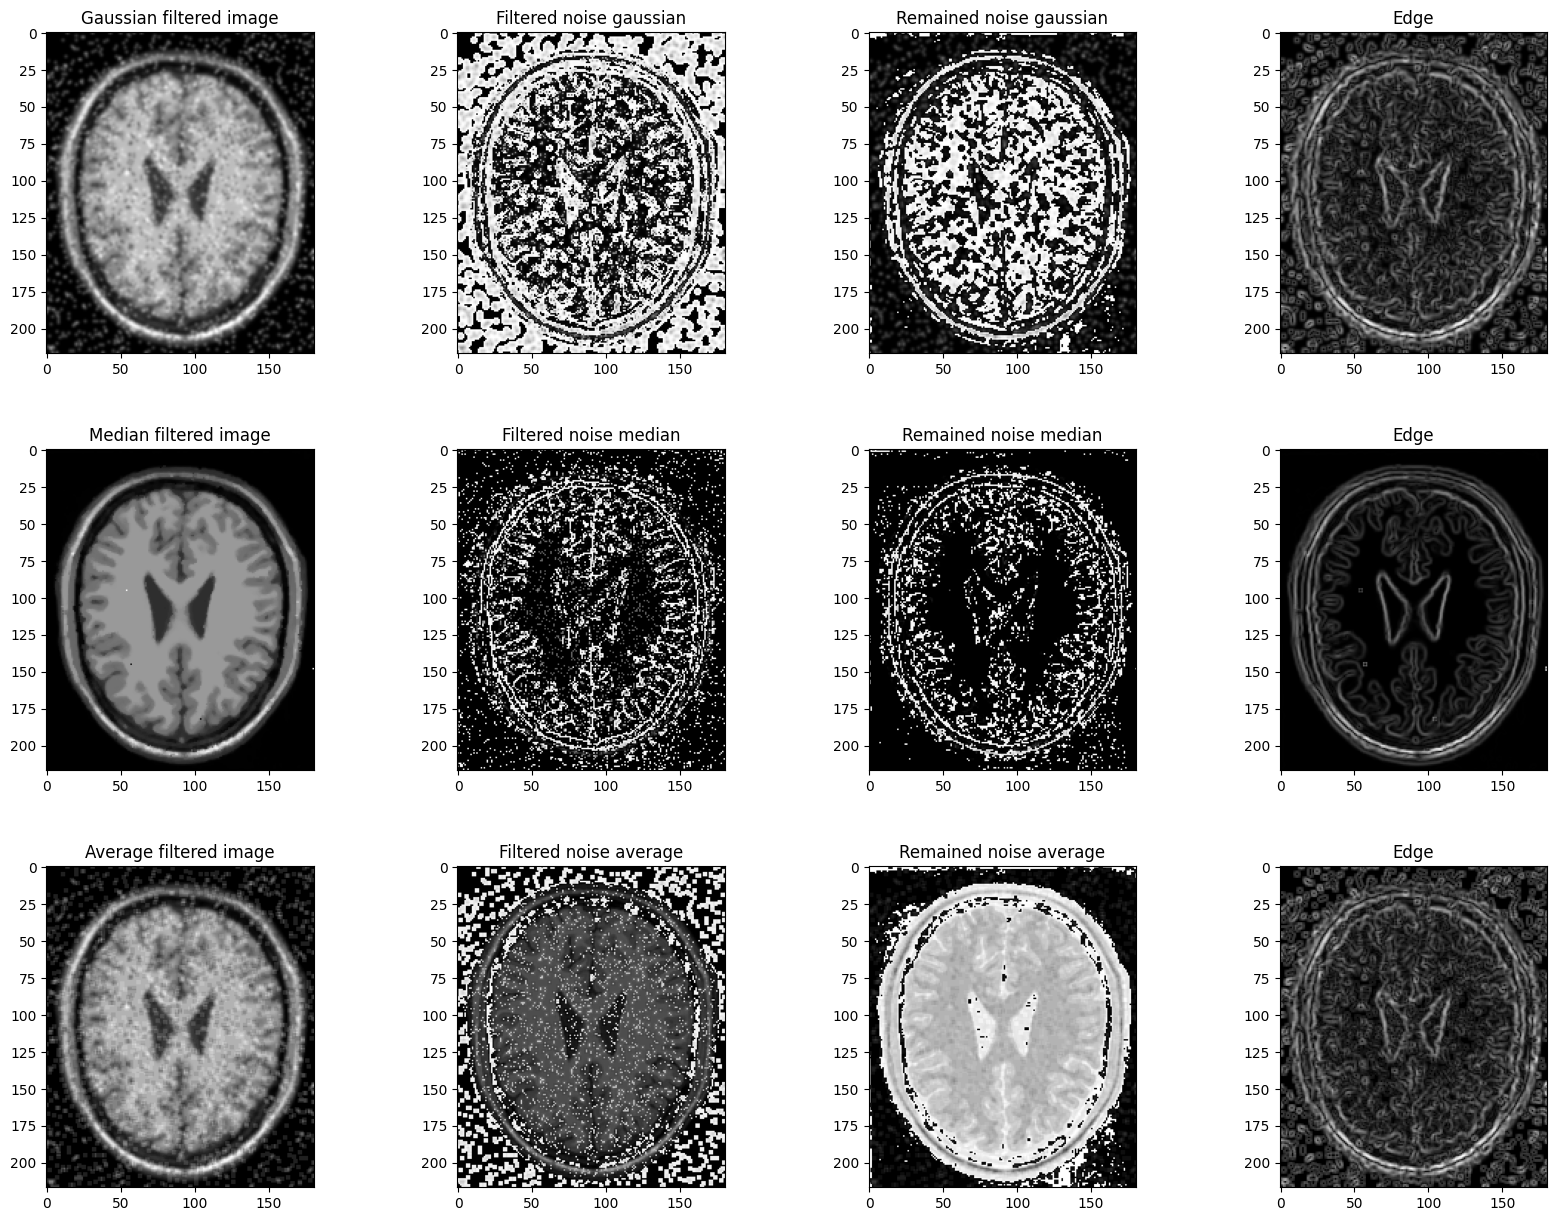

the RMSD of Gaussian filtered image is  8.100817246683182
the RMSD of Median filtered image is  3.404882156055702
the RMSD of Average filtered image is  9.478598376142434


In [7]:
# your code is here
import numpy as np
from skimage import io, transform
from skimage.filters import prewitt
import pylab
from pylab import show,title,figure,imshow,subplot,subplots_adjust
from scipy import misc,ndimage
from pylab import show,title,figure,subplot,subplots_adjust, imshow
from sklearn.metrics import mean_squared_error
import numpy as np


from os.path import dirname, join as pjoin, exists
from google.colab import drive


drive.mount('/content/gdrive')
path = pjoin('gdrive', 'MyDrive','WPO3')
filename_original = 'Brain.tiff'
filename_noise = 'Brain_noise_SnP.tiff'


orignial_image = io.imread(pjoin(path, filename_original), as_gray=False)
noise_image = io.imread(pjoin(path, filename_noise), as_gray=False)



#Gaussian Filter
gaussian_filtered_image = ndimage.gaussian_filter(noise_image, sigma = 1)
# Calculate the image of filtered noise
filtered_noise_gaussian = noise_image - gaussian_filtered_image
# Calculate the image of remained noise
remained_noise_gaussian = gaussian_filtered_image - orignial_image
# the edge maps of the filtered image.
edge_gaussian = prewitt(gaussian_filtered_image)


#Median Filter
median_filtered_image   = ndimage.median_filter(noise_image, size = 3)
# Calculate the image of filtered noise
filtered_noise_median = noise_image - median_filtered_image
# Calculate the image of remained noise
remained_noise_median = median_filtered_image - orignial_image
# the edge maps of the filtered image.
edge_median = prewitt(median_filtered_image)


#Average Filter
kernel = np.ones(shape=(3,3))/18
average_filtered_image  = ndimage.convolve (noise_image, kernel)
# Calculate the image of filtered noise
filtered_noise_average = noise_image - average_filtered_image
# Calculate the image of remained noise
remained_noise_average = average_filtered_image - orignial_image
# the edge maps of the filtered image.
edge_average = prewitt (average_filtered_image)

h,w=1,2
figure(figsize=(10,5));subplots_adjust(hspace=0.3, wspace=0.3)
subplot(h,w,1);imshow(orignial_image, cmap='gray');title('Original image')
subplot(h,w,2);imshow(noise_image, cmap='gray');title('Noise image')


h,w=3,4
figure(figsize=(20,15));subplots_adjust(hspace=0.3, wspace=0.3)
subplot(h,w,1);imshow(gaussian_filtered_image, cmap='gray');title('Gaussian filtered image')
subplot(h,w,2);imshow(filtered_noise_gaussian, cmap='gray');title('Filtered noise gaussian')
subplot(h,w,3);imshow(remained_noise_gaussian, cmap='gray');title('Remained noise gaussian')
subplot(h,w,4);imshow(edge_gaussian, cmap='gray');title('Edge')

subplot(h,w,5);imshow(median_filtered_image, cmap='gray');title('Median filtered image')
subplot(h,w,6);imshow(filtered_noise_median, cmap='gray');title('Filtered noise median')
subplot(h,w,7);imshow(remained_noise_median, cmap='gray');title('Remained noise median')
subplot(h,w,8);imshow(edge_median, cmap='gray');title('Edge')

subplot(h,w,9);imshow(average_filtered_image, cmap='gray');title('Average filtered image')
subplot(h,w,10);imshow(filtered_noise_average, cmap='gray');title('Filtered noise average')
subplot(h,w,11);imshow(remained_noise_average, cmap='gray');title('Remained noise average')
subplot(h,w,12);imshow(edge_average, cmap='gray');title('Edge')

show()

#Calculate the root mean squared differences (RMSD) of the pixels of the obtained filtered images with those of the ground truth.
RMSD_gaussian = np.sqrt(mean_squared_error(gaussian_filtered_image, orignial_image))
RMSD_median = np.sqrt(mean_squared_error(median_filtered_image, orignial_image))
RMSD_average = np.sqrt(mean_squared_error(average_filtered_image, orignial_image))
print(f"the RMSD of Gaussian filtered image is  {RMSD_gaussian}")
print(f"the RMSD of Median filtered image is  {RMSD_median}")
print(f"the RMSD of Average filtered image is  {RMSD_average}")


####Report

- Comment briefly on the results:

  The median filter has the best effect because it is most suitable for eliminating salt and pepper noise without blurring the overall image, and can better maintain the edge information of the image. The effect of the Gaussian filter is secondly, mainly used to remove high-frequency noise in the image and smooth the image, and maintain edge clarity to a certain extent. The mean filter is used to remove random noise and is the simplest image smoothing technology. Also it will cause the image to edges become blurred.


- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?
  
  By comparing processed images with this ground truth, we cann know the the effectiveness of noise removal for different filter method. And by  comparing processed images with the noise image, we can know how much noise was filtered out.

- Which filter works best in terms of RMSD and why?
  
  The median filter has the lowest RMSD value, which means that in terms of RMSD, the median filter performs the best among the three.

  The median filter is especially effective for salt-and-pepper noise,  it removes this noise by replacing each pixel value with the median value of the intensities in the neighborhood of that pixel. This has the effect of preserving edges while removing noise, which is  why it has the lowest RMSD in this case.


- Which filter preserves the edges the best?

  The median filter preserves the edges the best.


### 3 Image segmentation
Segmentation is the task of defining the boundaries of an object or region in an image. It is often used for measuring size or volume of organs or other tissues of interest. A multitude of different methods exist and the optimal choice of segmentation method is highly dependent on the region to be segmented, and the type and quality of the input image.
#### 3.1 Thresholding
Image thresholding is the simplest and fastest segmentation method. The process comes down to defining one or more boundaries of intensity in the im- age histogram. Pixels with intensity within the boundaries will get mapped to 1 (inside), while others are considered background. The process can be extended to multiple labels using multiple (upper and lower) boundaries.
Thresholding can be done by manually selecting the boundaries, or automatically, by optimizing the boundary values with respect to a certain criterion. For instance, Otsu thresholding will automatically select boundaries that maximize the between class variance of two or more regions.
#### 3.2 Region Growing
Region growing is an iterative segmentation approach in which an initial region (usually a single seed point) is grown by including its neighbouring pixels if they fulfil certain requirements.
In its simplest form, region growing is closely related to thresholding, mainly using the image intensity to drive the algorithm. The algorithm has the benefit of taking into account spatial connectivity, thereby enabling to limit the segmentation to connected regions.
#### 3.3 Dice Coefficient
A common way to evaluate segmentations is to compare the obtained object S, with the reference or ground truth R provided by physicians after manual segmentations. A popular measure for quantitative evaluation is computing the Dice coefficient D, which compares the volumes (|.|) of the overlap of both objects to average volume,

\begin{equation*}
D(S,R)= \frac{ 2|S∩R|} { |S| + |R|}
\end{equation*}



#### Example 5: [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py)

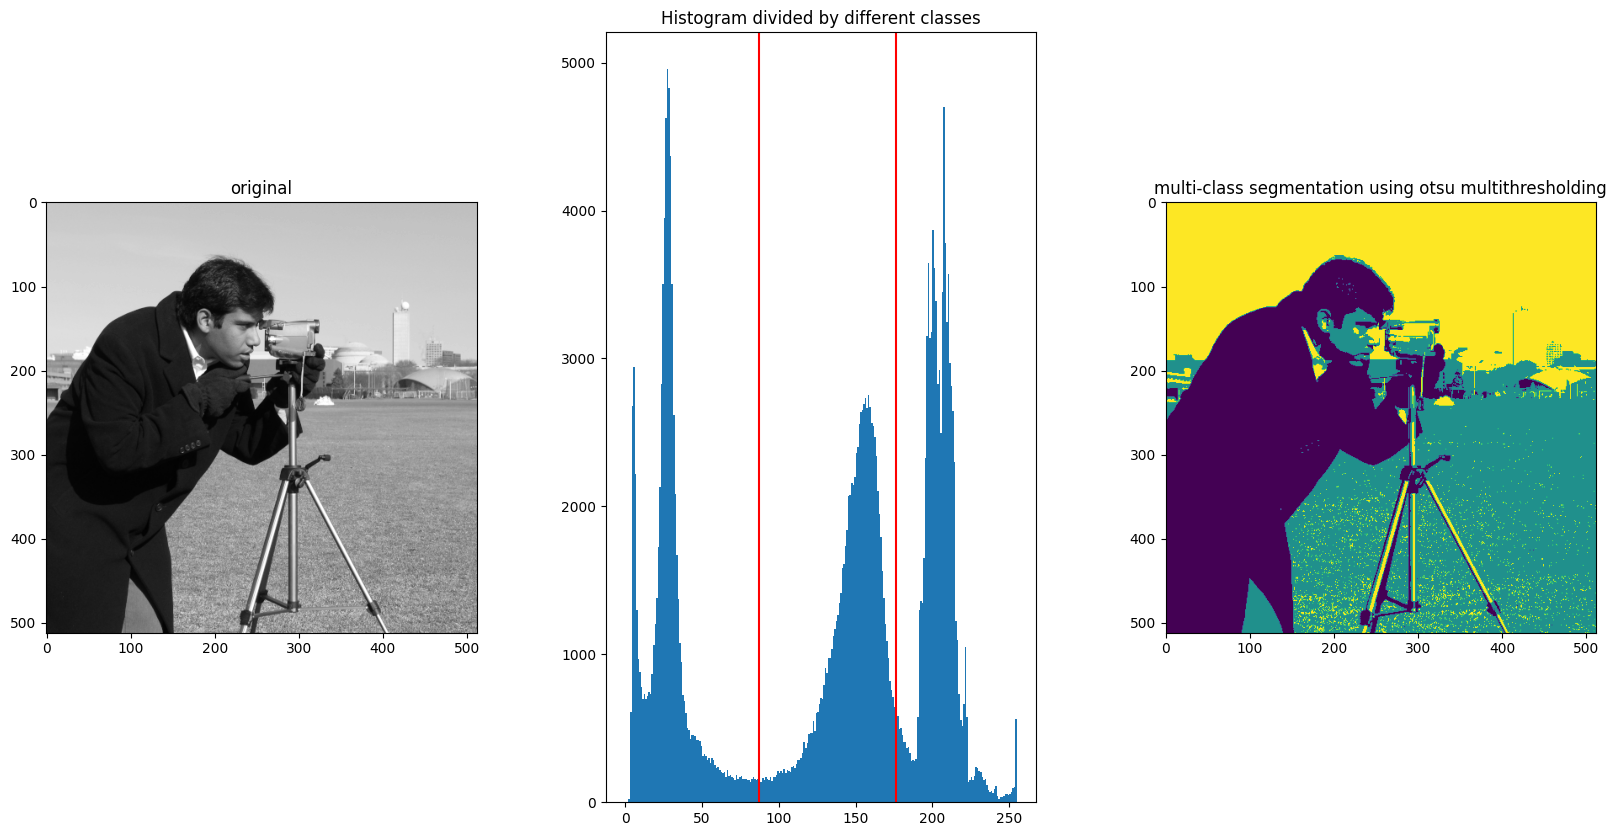

In [8]:
import numpy as np
from skimage import data
from skimage.filters import threshold_multiotsu
from pylab import show,title,figure,subplot,subplots_adjust, imshow, hist,axvline

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, 3, nbins=255)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

h,w=1,3                    # figure height and width
figure(figsize=(20,10));subplots_adjust(hspace=0.3, wspace=0.3)

subplot(h,w,1)
imshow(image, cmap='gray');title('original')

subplot(h,w,2)
hist(image.ravel(), bins=255, histtype = 'bar');title('Histogram divided by different classes')
for thresh in thresholds:
    axvline(thresh, color='r')

subplot(h,w,3)
imshow(regions);title('multi-class segmentation using otsu multithresholding')
show()


#### Exercise 3.1 [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) for segmenting ventricles and white matter.
By following the example 5, solve exercise 3.1:

- Read input image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
- Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Plot the histogram and the four thresholds obtained from [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py), result of multi-class segmentation using [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) and different four regions. Hint for plotting four different regions:
                  b0 = regions==0;imshow(b0,'gray');title('Background');show();
                  b1 = regions==1;imshow(b1,'gray');title('Ventricles');show();
                  b2 = regions==2;imshow(b2,'gray');title('Gray matter');show();
                  b3 = regions==3;imshow(b3,'gray');title('White matter');show();
- Calculate Dice coeffient between segmented ventricals (b1) and groundtruth image for ventricals segmentation (GroundTruthVentricles[:,:,0])
- Calculate Dice coeffient between segmented gray matter (b3) and groundtruth image for white matter segmentation (grndTruthWM1[:,:,0])

- Dice coefficient function:
    
     def dice_coeff(im1,im2):
         im1 = im1.astype(np.bool)
         im2 = im2.astype(np.bool)
         intersect = np.logical_and(im1,im2)
         return 2*intersect.sum()/(im1.sum() + im2.sum())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


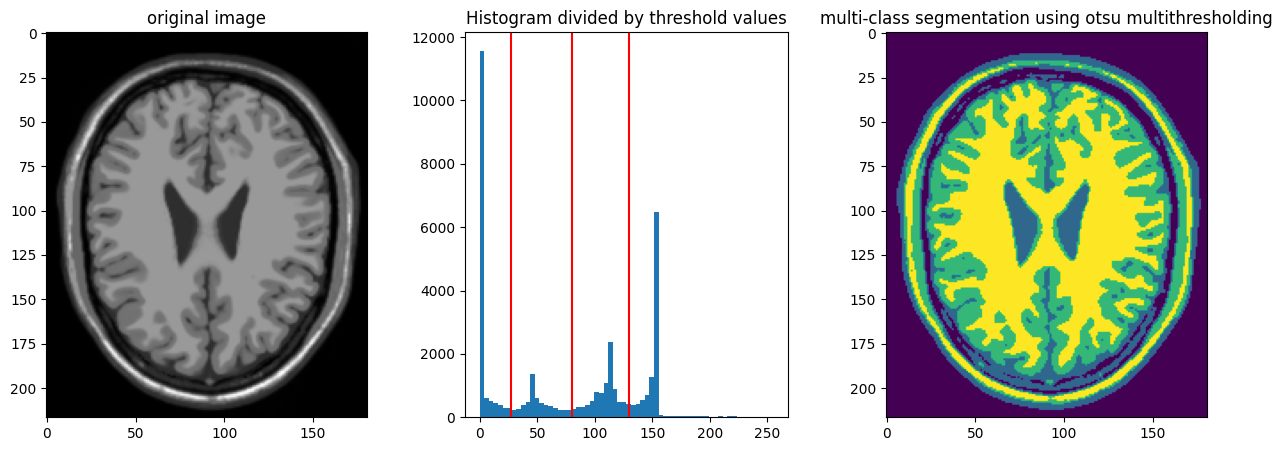

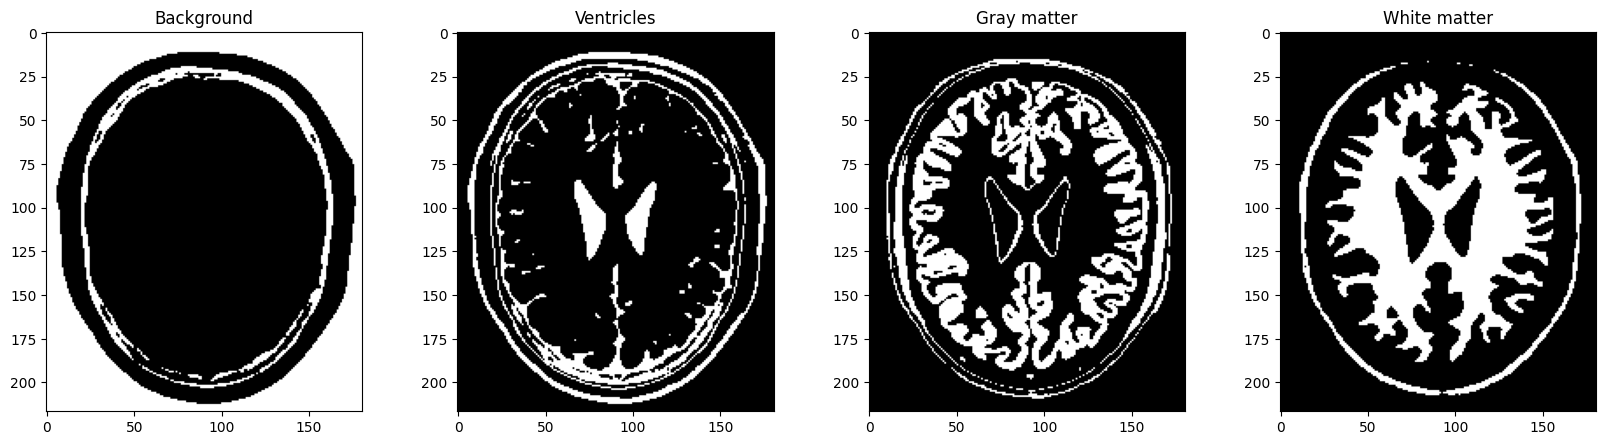

In [10]:
# your code is here
import numpy as np
from skimage import io, transform, img_as_ubyte, color
from skimage.filters import prewitt, threshold_multiotsu
from scipy import misc,ndimage
from pylab import show, title, figure, subplot, subplots_adjust, imshow, hist, axvline
from sklearn.metrics import mean_squared_error
from os.path import dirname, join as pjoin, exists
from google.colab import drive


drive.mount('/content/gdrive')
path = pjoin('gdrive', 'MyDrive','WPO3')
filename_original = 'Brain.tiff'
filename_ventrical = 'GroundTruthVentricles.tiff'
filename_WM = 'grndTruthWM1.tiff'

original_image = io.imread(pjoin(path, filename_original), as_gray=False)
ventricles_image = color.rgb2gray(color.rgba2rgb(io.imread(pjoin(path, filename_ventrical), as_gray=False)))
whitematter_image = color.rgb2gray(color.rgba2rgb(io.imread(pjoin(path, filename_WM), as_gray=False)))

thresholds = threshold_multiotsu(original_image, classes=4)
regions = np.digitize(original_image, thresholds)

h,w=1,3 # figure height and width
figure(figsize=(15,5));subplots_adjust(hspace=0.3, wspace=0.3)

subplot(h,w,1)
imshow(original_image, cmap='gray');title('original image')

subplot(h,w,2)
hist(original_image.ravel(), bins=64, histtype = 'bar');title('Histogram divided by threshold values')
for thresh in thresholds:
    axvline(thresh, color='r')

subplot(h,w,3)
imshow(regions);title('multi-class segmentation using otsu multithresholding')
show()

h,w=1,4
figure(figsize=(20,10));subplots_adjust(hspace=0.3, wspace=0.3)
subplot(h,w,1); b0 = regions==0;  imshow(b0,'gray');  title('Background');
subplot(h,w,2); b1 = regions==1;  imshow(b1,'gray');  title('Ventricles');
subplot(h,w,3); b2 = regions==2;  imshow(b2,'gray');  title('Gray matter');
subplot(h,w,4); b3 = regions==3;  imshow(b3,'gray');  title('White matter');
show();

In [11]:
# your code is here
def dice_coeff(im1,im2):
   im1 = im1.astype(bool)
   im2 = im2.astype(bool)
   intersect = np.logical_and(im1,im2)
   return 2*intersect.sum()/(im1.sum() + im2.sum())

v0 = dice_coeff(b1, ventricles_image)
wm0 = dice_coeff(b3, whitematter_image)
print("Dice coeffient between segmented ventricals and groundtruth image: ", v0)
print("Dice coeffient between segmented white matter and groundtruth image: ", wm0)

Dice coeffient between segmented ventricals and groundtruth image:  0.2424980959634425
Dice coeffient between segmented white matter and groundtruth image:  0.848851269649335


#### Exercise 3.2 Region Growing Segmentation
You should note that in the previous exercise it was not possible to separate the ventricles or white matter from some other structures completely. In this exercise will attempt to do this by implementing a region growing algorithm in its simplest form.
The algorithm should output a binary image with pixel values 1 for the structure under study and 0 for all other pixels. As an input it should use one or two threshold values that were obtained from the previous exercise and a seed point.

To select your seeds for the region growing algorithm, inspect the image and find a point coordinate (X,Y) which later will be used as a seed point for your segmentation algorithm. A chosen point location has to be within the structure you are planning to segment.

Using the implemented algorithm, try to segment each of the ventricles and the white matter using suitable seed points and calculate the Dice coefficients with respect to the ground truth images introduced above.

##### Ventricles segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- For the first ventricle segmentation
- Step 4. Choose seed point. There are two ventricles, therefore, user has to repeat the process of choosing seed point twice.
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
- For the second ventricle segmentation
- Step 6. Repeat steps 4 and 5
- Step 7. Get final segmentation by adding first and second ventricle segmentations.
- Step 8. Calculate Dice coefficient between final ventricles segmentation and groundtruth (GroundTruthVentricles[:,:,0]).  

##### White matter segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Step 4. Choose seed point.
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
- Step 6. Calculate Dice coefficient between final ventricles segmentation and groundtruth (grndTruthWM1[:,:,0]).

##### Improving results
Improve you segmentation region growing results - both for the ventricles and white matter - using morphological operations.
[Sci-kit image - morphology](https://scikit-image.org/docs/dev/api/skimage.morphology.html)

#### Report
- For Exercises 3.1 and 3.2 plot a 2-by-3 figure of the segmentations of the ventricles and white matter (after thresholding, region growing and region growing followed by morphological operations) and their corresponding ground truth.
- Provide a table of the obtained Dice coefficients for each method and each structure.
- Briefly comment on the obtained results for the segmentations and corresponding measures.
- What morphological methods did you use? Why?

#### Hints on writing your own region growing function:
To build this function:
- Start from the seed point
- List the 4 (or 8) neighboring pixels
- Check if their intensity falls within the threshold boundaries.
- Grow your region by adding the pixels that meet the condition.
- List all new neighboring pixels of the obtained new region.
- Repeat until there are no more pixels added.

It may be handy to store the indexes (locations) and values of pixels which are already marked inside and those, which are currently marked as neighbors. For example: 0 - outside, 1 - inside, 2 - neighbor.

+-----------------------------------------------------------------------+
|            Dice Coefficient when comparing to ground-truth            |
+--------------+-----------------+-----------------+--------------------+
|              |    Threshold    |  Region Growing | Morph Improvements |
+--------------+-----------------+-----------------+--------------------+
|  Ventricles  | 0.2424980959634 | 0.9522292993630 | 0.9522292993630573 |
|              |       425       |       573       |                    |
| White Matter | 0.8488512696493 | 0.8294038201813 | 0.8294038201813622 |
|              |        35       |       622       |                    |
+--------------+-----------------+-----------------+--------------------+


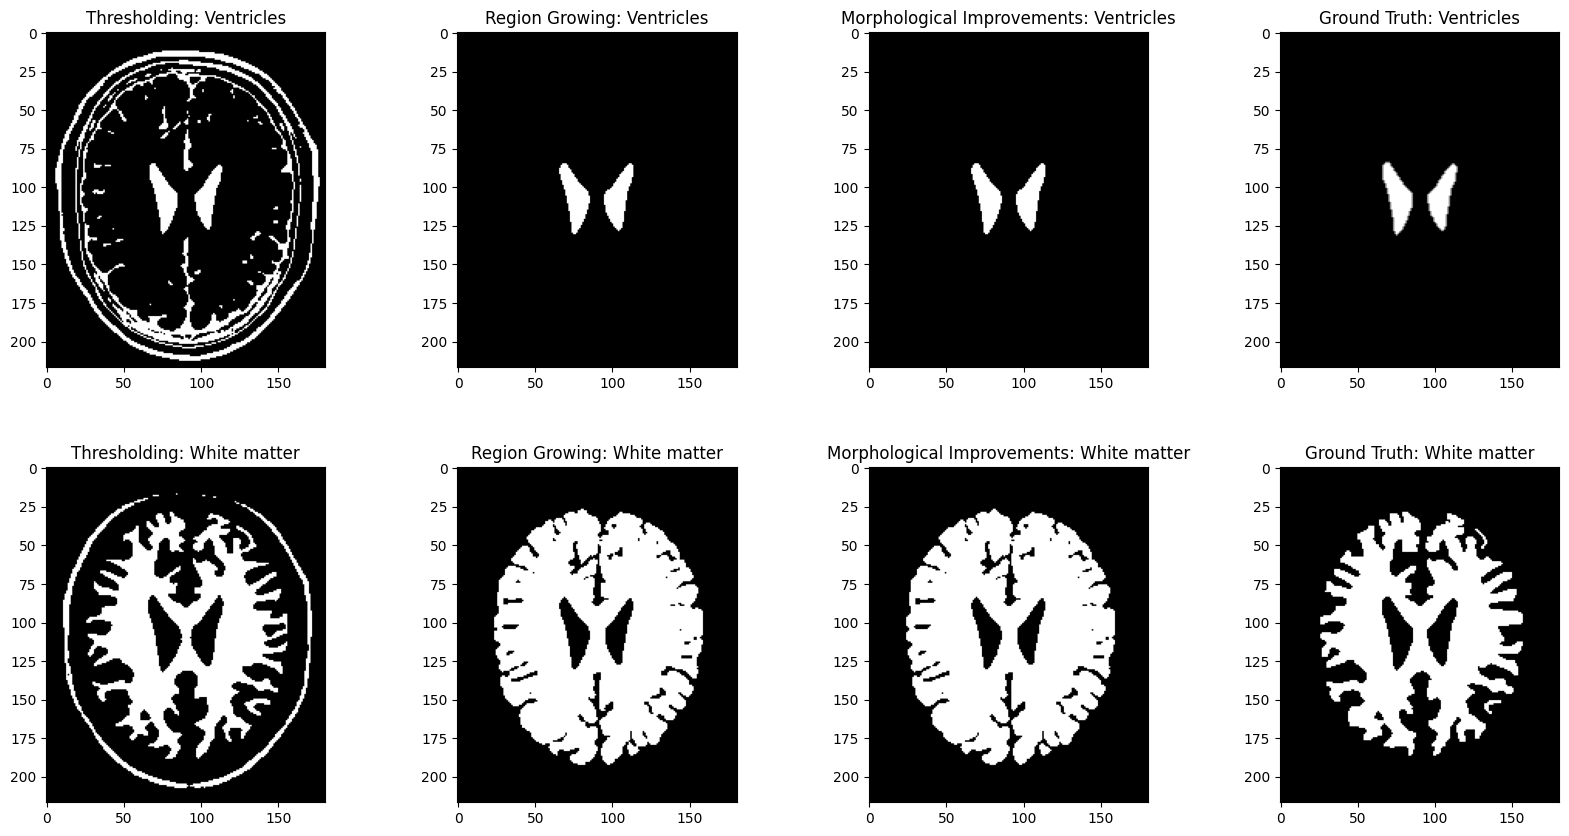

In [19]:
# your code is here
import skimage
def region_growing(img, seed, threshold, conn):
    height, width = img.shape
    binary_seg = np.zeros_like(img, dtype=bool)
    stack = [seed]

    while stack:
        current_point = stack.pop()
        if not (0 <= current_point[0] < height) or not (0 <= current_point[1] < width):
            continue

        if binary_seg[current_point] == 1:
            continue

        if abs(int(img[current_point]) - int(img[seed])) <= threshold:
            binary_seg[current_point] = 1
            neighbors = [(current_point[0] + 1, current_point[1]),
                         (current_point[0] - 1, current_point[1]),
                         (current_point[0], current_point[1] + 1),
                         (current_point[0], current_point[1] - 1)]

            for n in neighbors:
              if binary_seg[n] == 1 or n in stack:
                neighbors.remove(n)

            stack.extend(neighbors)

    return binary_seg


# ventricular segmentation image
threshold = thresholds[1] - thresholds[0]
v_seed = (100, 70)
ventricules_seg_image_1 = region_growing(original_image, v_seed, threshold, 4)
v_seed = (100, 110)
ventricules_seg_image_2 = region_growing(original_image, v_seed, threshold, 4)
ventricules_seg_image= np.logical_or(ventricules_seg_image_1, ventricules_seg_image_2)
ventricules_seg_image = img_as_ubyte(ventricules_seg_image)

# white matter segmentation image
threshold = thresholds[1] - thresholds[0]
wm_seed = (100, 90)
wm_seg_image_1 = region_growing(original_image, wm_seed, threshold, 4)
wm_seed = (155, 132)
wm_seg_image_2 = region_growing(original_image, wm_seed, threshold, 4)
wm_seg_image = np.logical_or(wm_seg_image_1, wm_seg_image_2)

# morphological improvements
ventricules_seg_image_morph = skimage.morphology.dilation(ventricules_seg_image, footprint=None)
ventricules_seg_image_morph = skimage.morphology.erosion(ventricules_seg_image_morph, footprint=None)

wm_seg_image_morph = skimage.morphology.erosion(wm_seg_image, footprint=None)
wm_seg_image_morph  = skimage.morphology.dilation(wm_seg_image_morph , footprint=None)

h,w=2,4
figure(figsize=(20,10));subplots_adjust(hspace=0.3, wspace=0.3)

subplot(h,w,1); b1 = regions==1;  imshow(b1,'gray');  title('Thresholding: Ventricles');
subplot(h,w,2); imshow(ventricules_seg_image, cmap='gray'); title('Region Growing: Ventricles')
subplot(h,w,3); imshow(ventricules_seg_image_morph, cmap='gray'); title('Morphological Improvements: Ventricles')
subplot(h,w,4); imshow(ventricles_image, cmap='gray'); title('Ground Truth: Ventricles')

subplot(h,w,5); b3 = regions==3;  imshow(b3,'gray');  title('Thresholding: White matter');
subplot(h,w,6); imshow(wm_seg_image, cmap='gray'); title('Region Growing: White matter')
subplot(h,w,7); imshow(wm_seg_image_morph, cmap='gray'); title('Morphological Improvements: White matter')
subplot(h,w,8); imshow(whitematter_image, cmap='gray'); title('Ground Truth: White matter')

v1 = dice_coeff(ventricules_seg_image, ventricles_image)
v2 = dice_coeff(ventricules_seg_image_morph, ventricles_image)
wm1 = dice_coeff(wm_seg_image, whitematter_image)
wm2 = dice_coeff(wm_seg_image_morph, whitematter_image)

from prettytable import PrettyTable
v_values = [v0, v1, v2]
mw_values = [wm0, wm1, wm1]

columns = ["Threshold", "Region Growing", "Morph Improvements"]
table_name = "Dice Coefficient when comparing to ground-truth"

table = PrettyTable()
table.field_names = [""] + columns
table.max_width["Threshold"] = 15
table.max_width["Region Growing"] = 15
table.max_width["Morphological Improvements"] = 15

table.add_row(["Ventricles"] + v_values)
table.add_row(["White Matter"] + mw_values)

table.title = table_name

print(table)

#####Report

- Briefly comment on the obtained results for the segmentations and corresponding measures.

  After the segmentations, the ventricule part and the white matter part are clearly separated. But after the improvements, the results have no  significant changes.


- What morphological methods did you use? Why?

  We used dilation and erosion to refine the segmentation results by smoothing edges and filling gaps.
  Especially, The erosion first and then dilation is used to eliminate small objects and the dilation first and then erosion is used to fill small holes.
